# DATASET UTILIZADO

O conjunto de dados utilizado está disponível no site kaggle (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

## O problema a ser resolvido:

Doenças cardiovasculáres são responsáveis por 17,9 milhões de mortes anualmente, algo próximo a 31% das mortes em todo o planeta. Um terço dessas MORTES ocorre de forma prematura, em pessoas com menos de 70 anos. Compreender os fatores que podem estar associados ao risco de doenças cardiovasculares é de extrema importância para um diagnóstico precoce, com mais chances de tratamento, garantindo uma maior expectativa de vida para o paciente.

## Objetivo:

O objetivo deste projeto é utilizar algoritmos em python para a análise dos dados fornecidos e em seguida implementação de modelos de machine learning, buscando prever a presença de alguma doença cardiáca.

## Proposta de solução:

A modelagem dessa solução será feita utilizando algoritmos de classificação, visando comparar a performance deles utilizando a métrica f1-score.

## Estrategia para a solução:

A solução será construída seguindo os seguintes passos:

- 1. Compreensão do problema;  
&nbsp;
- 2. Compreensão dos dados:  
    Será feita análise dos dados, buscando entender as condições do dataset e detectar possíveis imperfeições nos dados fornecidos (dados faltantes, repetidos, tipagem dos dados). Em seguida, será realizada uma EDA (Exploratory Data Analisys) para a compreensão da balanceamento da variável resposta e análises univariada, bivariada e multivariada.
  
- 3. Preparação dos dados:  
	Após o entendimento do dataset, ele será preparado para a modelagem, através do tratamento das variáveis categóricas, separação dos dados em conjuntos de treino e teste, rescaling dos dados, seleção de features mais adequadas a modelagem.
                        
- 4. Modelagem:  
	Para a modelagem do problema exposta serão utilizados os seguintes algoritmos de classificação: Logistic Regression, Random Forest, Extreme Gradient Boosting, Decision Tree, Support Vector Machine, K-Nearest Neighbors. Atrelado a esses modelos estará o uso da técnica de cross validation, utilizando 5 folds e posterior tunning do melhor modelo utilizando GridSearch.  

- 5. Avaliação:  
	As métricas utilizadas na modelagem serão, precisão, recall, f1-score e matriz de confusão. Entretanto, a métrica utilizada para a seleção do melhor modelo para tunning será o f1-score.  

- 6. Implementação:  
	AINDA A SER REALIZADO, SERÁ UTILIZADO STREAMLIT APP.  

# 0.0 IMPORTS

In [131]:
# Importing libs

import numpy  as np
import pickle
import pandas as pd
import warnings 

from datetime import datetime

import seaborn             as sns
import matplotlib.pyplot   as plt
import matplotlib.gridspec as gs

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

from boruta import BorutaPy

from sklearn import svm
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from IPython.display       import Image
from IPython.core.display  import HTML

warnings.filterwarnings('ignore')

## 0.1 Helper Functions

In [132]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 10]

    display(HTML('<style>.container {width:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)

    sns.set()

In [133]:
jupyter_settings()

## 0.2 Loading Data

In [134]:
df_raw = pd.read_csv('heart.csv')

In [135]:
df_raw.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 1.0 DATA DESCRIBE

In [136]:
df1 = df_raw.copy()

## 1.1 Data Dimensions

In [137]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of attributes: {}'.format(df1.shape[1]))

Number of rows: 918
Number of attributes: 12


## 1.2 Data types

In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Análise:**  
Os atributos apresentam a tipagem correta. Sendo cinco variáveis categóricas e sete variáveis numéricas.

## 1.3 Check NA (%)

In [139]:
df_na = df1.isna().sum().sort_values(ascending=False)/df1.shape[0]*100
df_na

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

**Análise:**  
Não há valores faltantes nos atributos, portanto nenhuma premissa será utilizada.

## 1.4 Check Duplicates

In [140]:
df1.duplicated().sum()

0

**Análise:**  
Não há instâncias duplicadas.

## 1.5 Analisys columns

In [141]:
df1.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# 2.0 EXPLORATORY ANALISYS - EDA

In [142]:
df2 = df1.copy()

In [143]:
num_attributes = df2.select_dtypes(include=['int64', 'float64'])
cat_attributes = df2.select_dtypes(exclude=['int64', 'float64'])

**Análise:**  
Os atributos foram separados em variáveis categóricas e numéricas. Esses dois grupos serão analisados adiante.

## 2.1 Statistic analisys

### 2.1.1 Response Variable

In [144]:
df2['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

**Análise:**  
As classes da variável resposta (*HeartDisease*) apresentam um leve desbalanceamento, 55% como classe 1 e 45% como classe 0. Essa sutil desproporção não deve prejudicar o algoritmo de aprendizado, portanto, nenhum tratamento será feito nessa etapa.

### 2.1.2 Numerical Variable

Serão realizadas aqui análises estatísticas, utilizando-se medidas de dispersão (desvio padrão, *range*, assimetria e curtose) para verificar a variabilidade dos dados e medidas de tendência central (média e mediana) para observar como elas reagem ao conjunto de dados disponível.

In [145]:
# Tendência central - média e mediana
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersão - desvio padrão, min, max, curtose
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max()-x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,kurtosis
0,Age,28.0,77.0,49.0,53.510893,54.0,9.427478,-0.386140
1,RestingBP,0.0,200.0,200.0,132.396514,130.0,18.504067,3.271251
2,Cholesterol,0.0,603.0,603.0,198.799564,223.0,109.324551,0.118208
3,FastingBS,0.0,1.0,1.0,0.233115,0.0,0.422815,-0.401960
4,MaxHR,60.0,202.0,142.0,136.809368,138.0,25.446463,-0.448248
5,Oldpeak,-2.6,6.2,8.8,0.887364,0.6,1.065989,1.203064
6,HeartDisease,0.0,1.0,1.0,0.553377,1.0,0.497143,-1.958008


**Análise:**  
A tabela acima mostra uma média e mediana próxima para as variáveis *age*, *RestingBP* e *Oldpeak*, o que sugere uma distribução simétrica para essas features. Entretanto, a variável, *Cholesterol* apresenta valores de média e mediana levemente divergentes, além disso, apresenta desvio padrão relativamente alto quando comparado com a média, esse atributo apresenta portanto uma variabilidade considerável que deve ser ponderada durante a modelagem. Por fim, a variável *FastingBS* possui classes 0 (índice glicemico < 120 mg/dL) e 1 (índice glicemico > 120mg/dL), um valor de aproximadamente 0,23 para a média mostra um desequilíbrio entre as classes, com uma proporção maior de classe 0.  

**Kurtosis:**  
A curtose, responsável por medir o grau de "achatamento" de uma distribuição em relação a distribuição normal tem como referência o valor padrão 3. Das features analisadas, somente *RestingBP* possui curtose próxima a 3, as outras destoam bastante, sendo possível observar o perfil dessas curvas no heatmap a seguir.

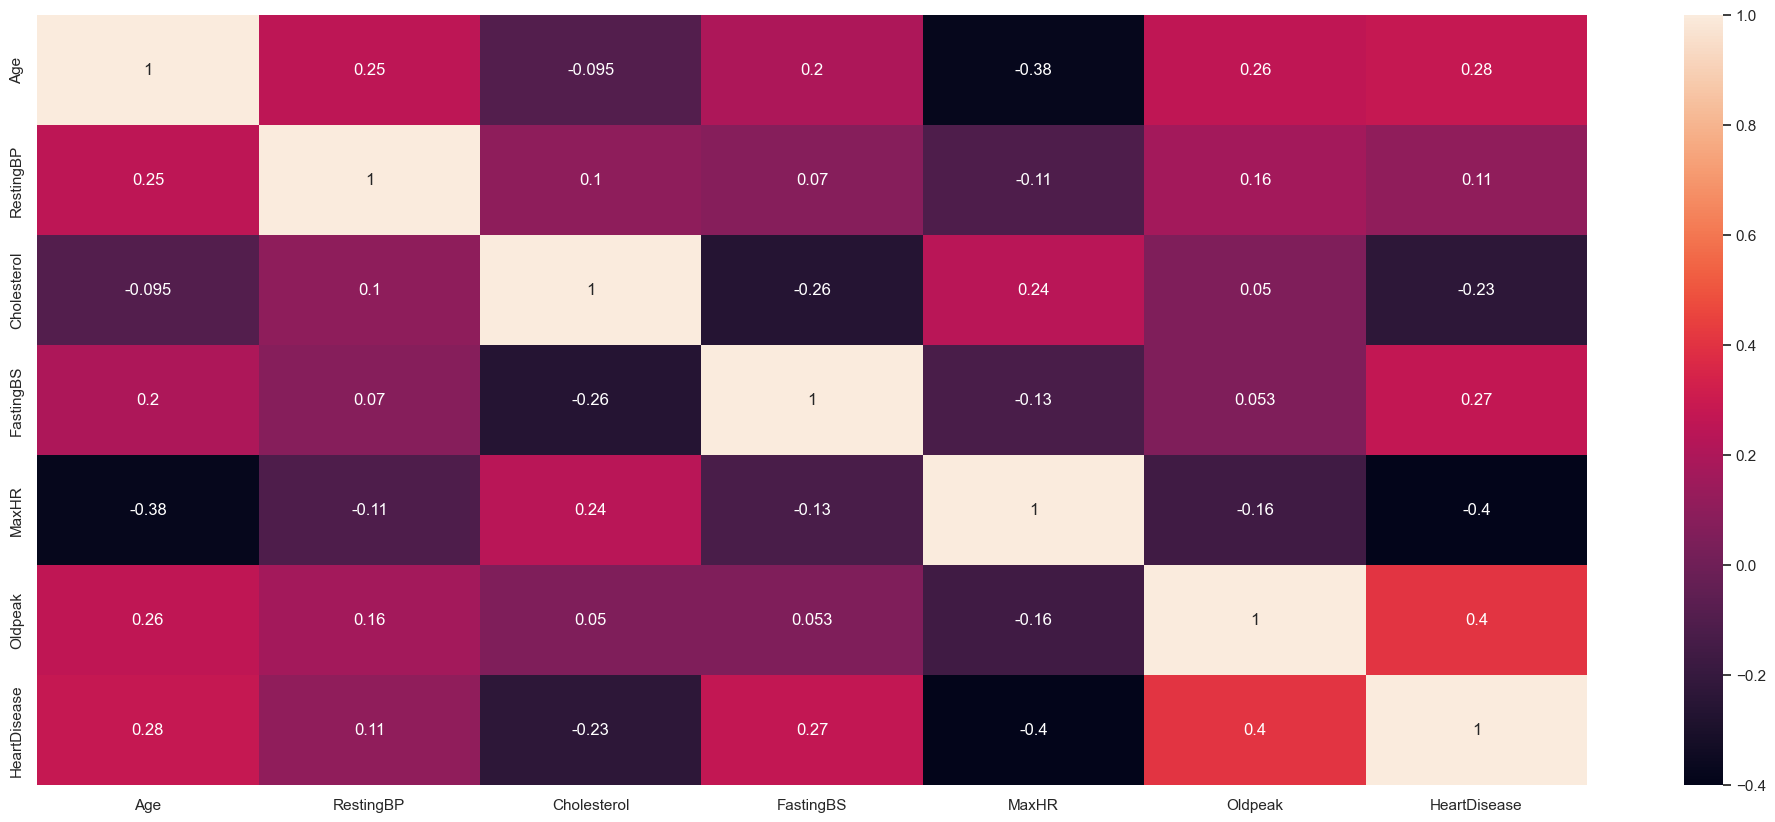

In [146]:
sns.heatmap(data=df2.corr(method='pearson'), annot=True);

**Análise:**  
O heatmap acima mostra as correlações entre as features numéricas. Tomando como referência a variável de interesse (*HeartDisease*) os dois atributos com maiores valores são *MaxHR* e *Oldpeak* com correlações negativa e positiva, respectivamente.  
Observando o comportamento das variáveis entre si, nenhuma delas apresenta colinearidade significativa, entretanto *MaxHR* e *Age* são um ponto de atenção.

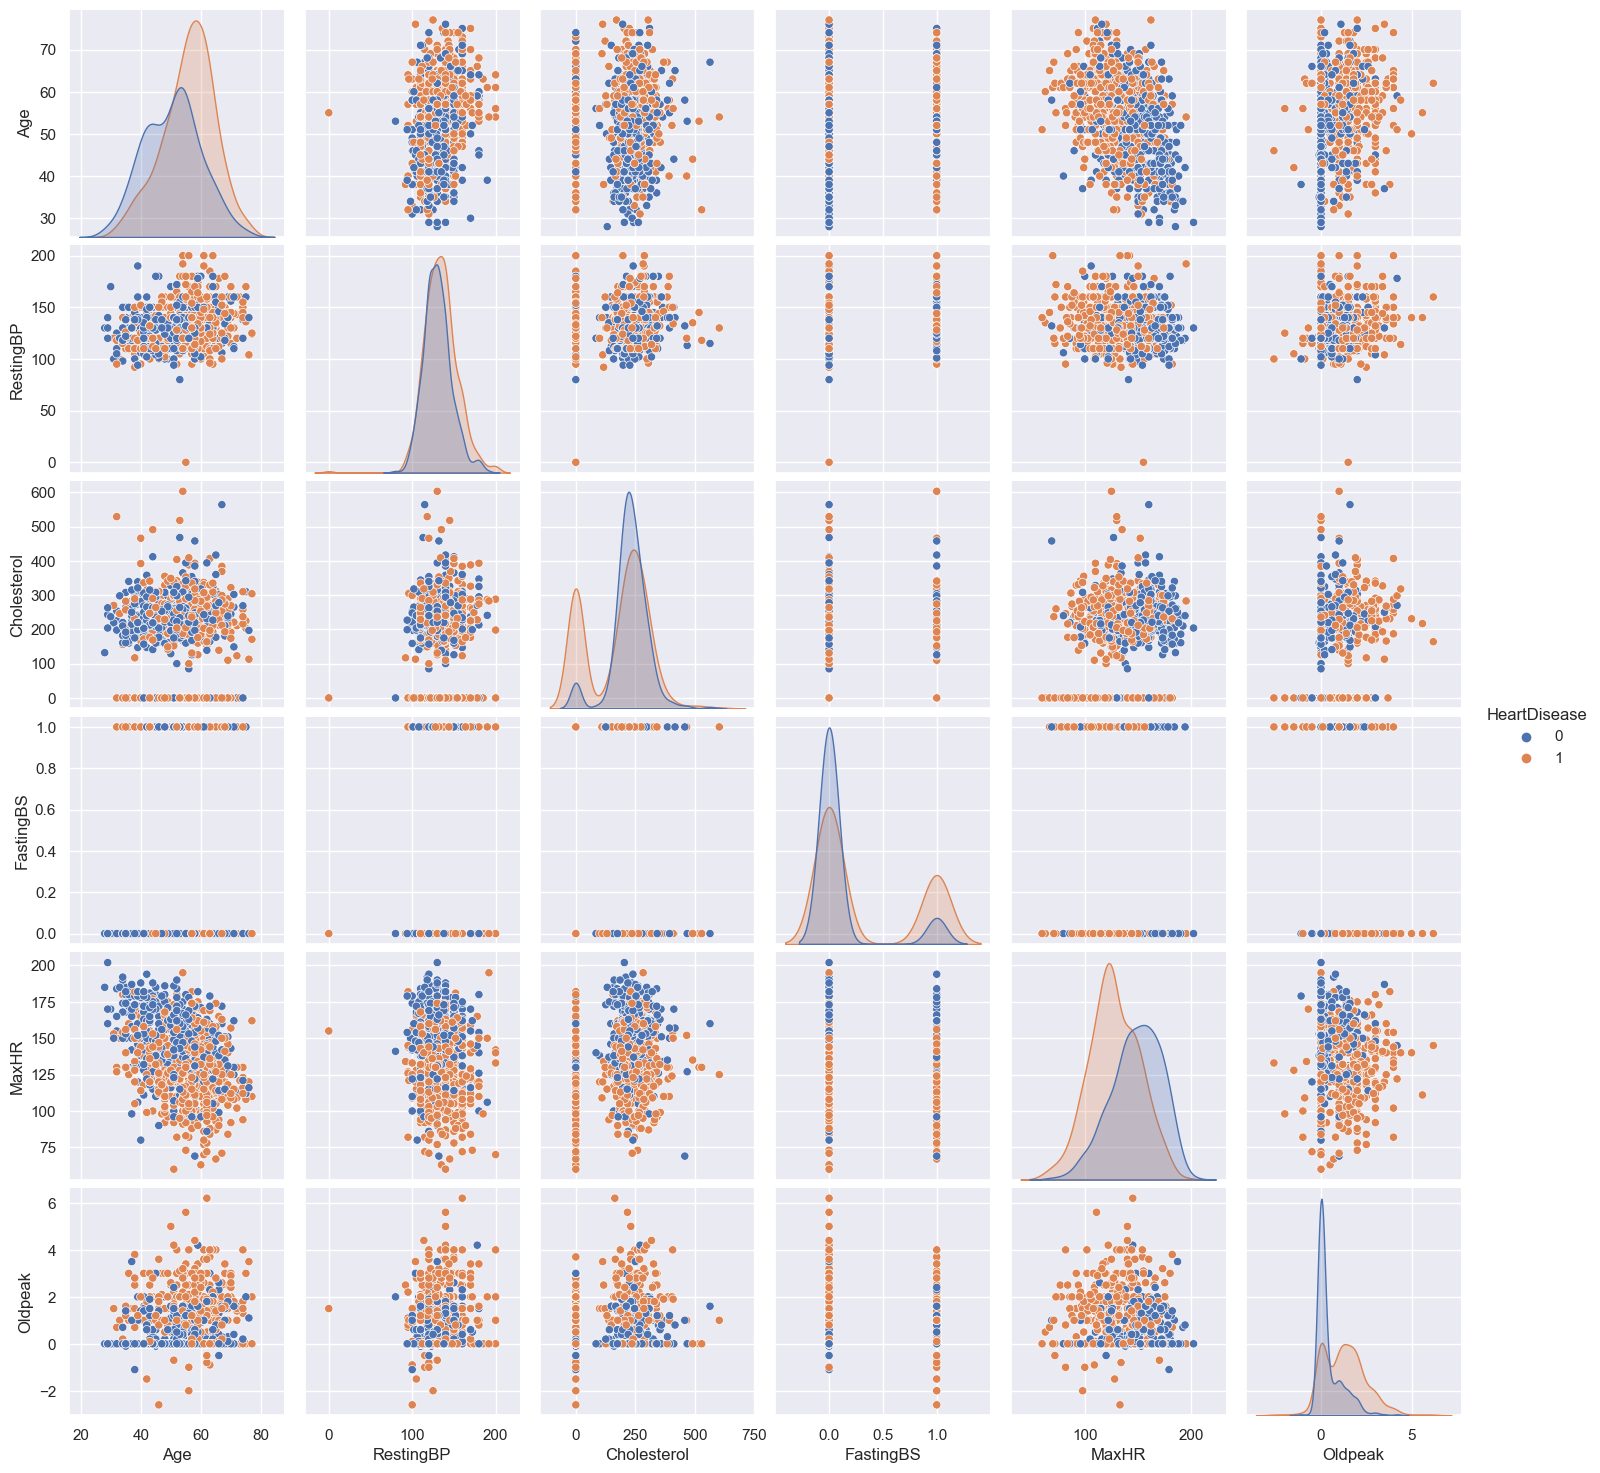

In [147]:
sns.pairplot(num_attributes, hue='HeartDisease');

**Análise:**  
O pairplot acima, apresenta uma razóavel divisão entre as classes de interesse quando observada a feature de *MaxHR*, sendo possível observar que instâncias classificadas como 0 tendem a ter um *MaxHR* elevado.

## 2.2 Categorys analisys

### 2.2.1 Heart Disease and Categorical Features

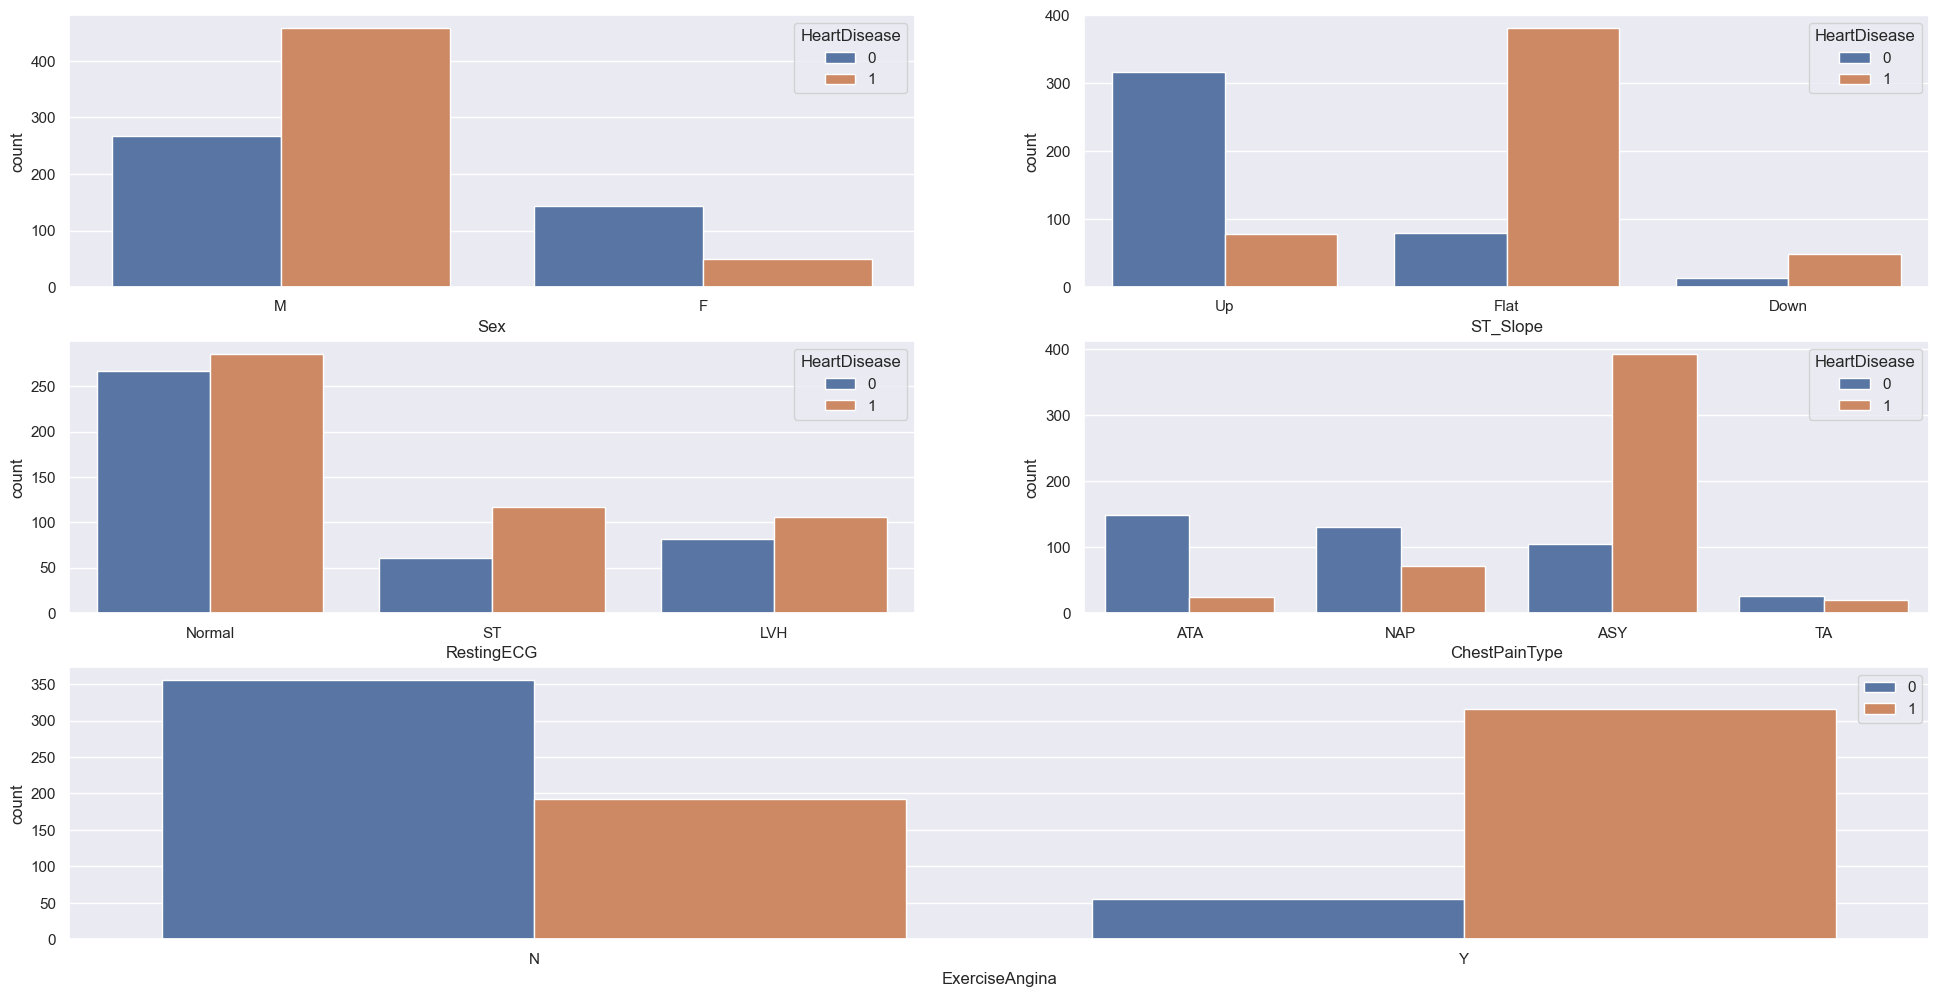

In [148]:
fig = plt.figure(figsize=(24, 12))
spec = gs.GridSpec(ncols = 2, nrows = 3, figure = fig)

ax1 = fig.add_subplot(spec[0,0]) # primeira linha e primeira coluna
ax2 = fig.add_subplot(spec[0,1]) # primeira linha e segunda coluna
ax3 = fig.add_subplot(spec[1,0]) # segunda linha e primeira coluna
ax4 = fig.add_subplot(spec[1,1]) # segunda linha e segunda coluna
ax5 = fig.add_subplot(spec[2,:]) # terceira linha e duas colunas

sns.countplot(x=df2['Sex'], hue=df2['HeartDisease'], ax=ax1);
sns.countplot(x=df2['ST_Slope'], hue=df2['HeartDisease'], ax=ax2);
sns.countplot(x=df2['RestingECG'], hue=df2['HeartDisease'], ax=ax3);
sns.countplot(x=df2['ChestPainType'], hue=df2['HeartDisease'], ax=ax4);
sns.countplot(x=df2['ExerciseAngina'], hue=df2['HeartDisease'], ax=ax5);
plt.legend();

### 2.2.2 Age distribution by sex

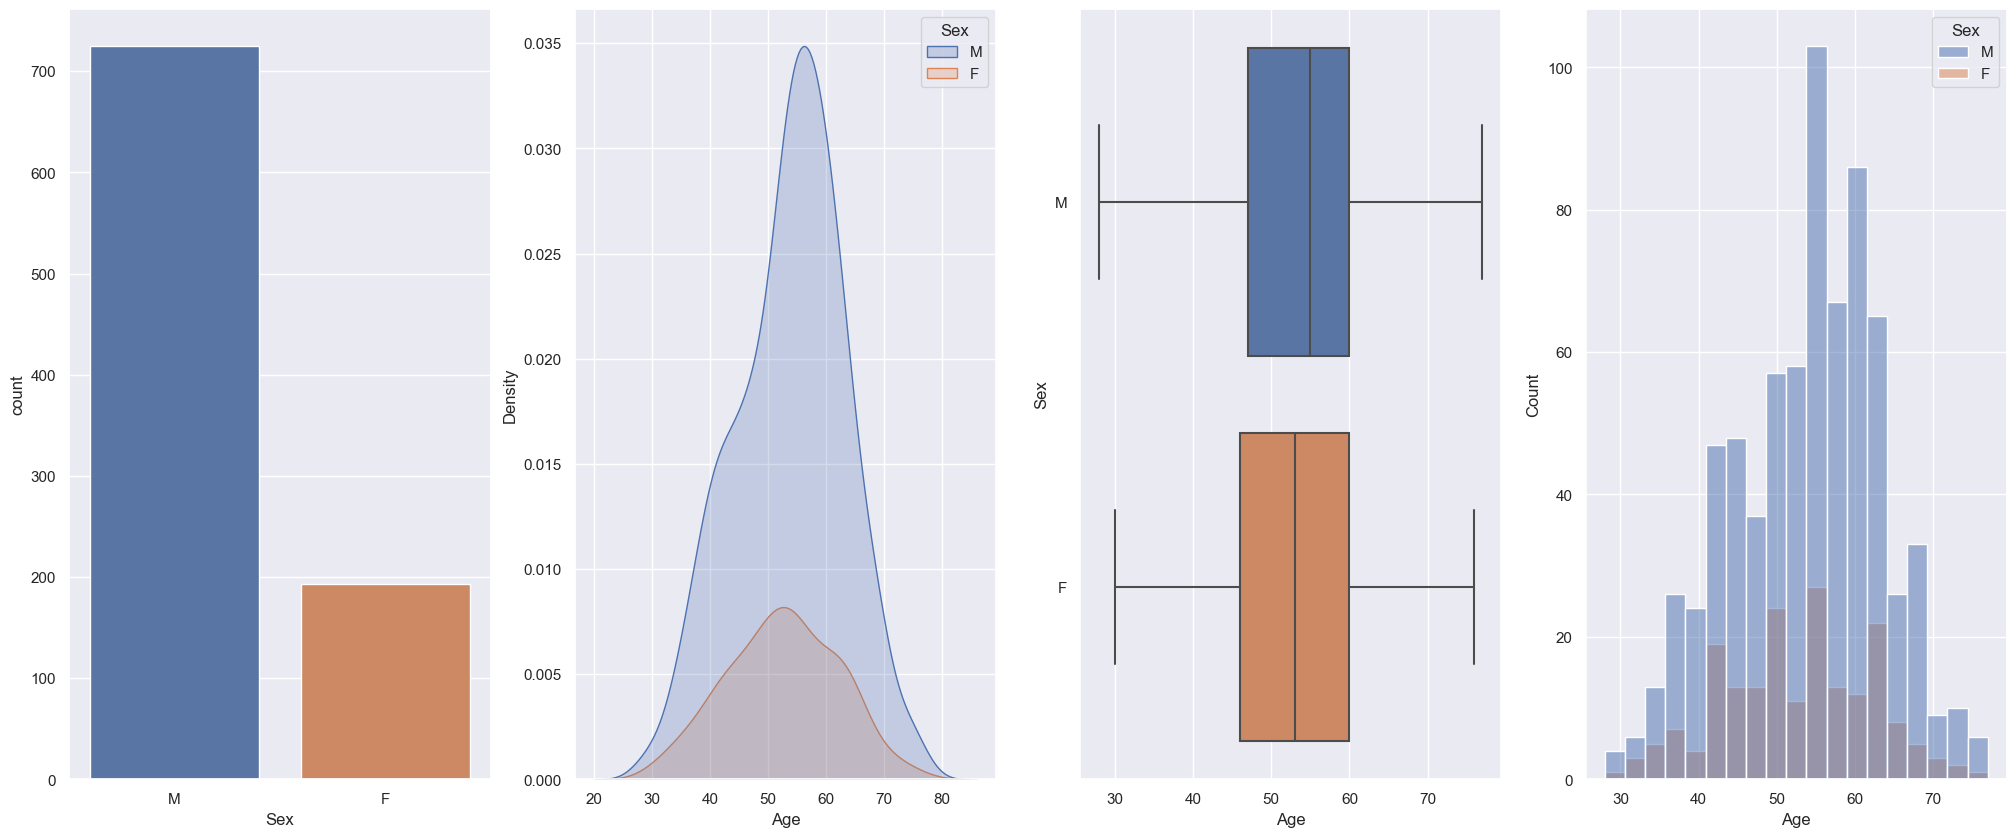

In [149]:
plt.subplot(1, 4, 1)
sns.countplot(x=df2['Sex']);

plt.subplot(1, 4, 2)
sns.kdeplot(data=df2, x='Age', hue='Sex', shade=True);

plt.subplot(1, 4, 3)
sns.boxplot(y='Sex', x='Age', data=df2);

plt.subplot(1, 4, 4)
sns.histplot(x=df2['Age'], hue=df2['Sex']);

### 2.2.4 Max Heart Rate (MaxHR) relations

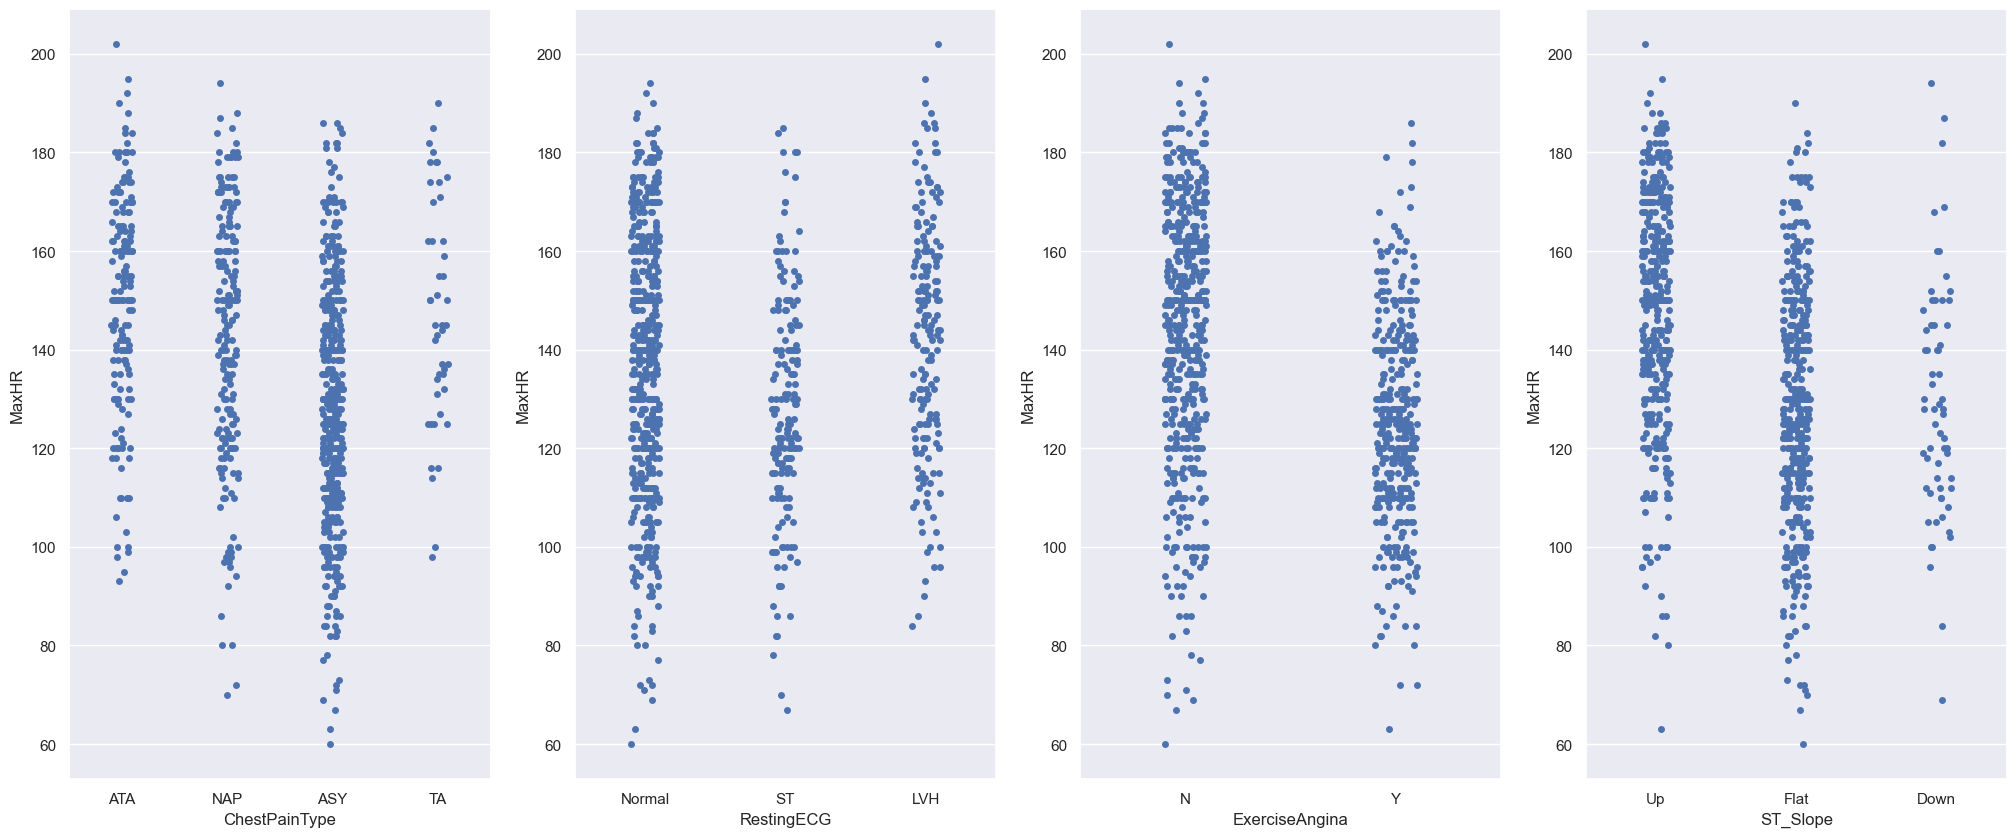

In [150]:
graph2 = df2[['ChestPainType', 'MaxHR']]
plt.subplot(1, 4, 1)
sns.stripplot(x='ChestPainType', y='MaxHR', data=graph2);

graph3 = df2[['RestingECG', 'MaxHR']]
plt.subplot(1, 4, 2)
sns.stripplot(x='RestingECG', y='MaxHR', data=graph3);

graph4 = df2[['ExerciseAngina', 'MaxHR']]
plt.subplot(1, 4, 3)
sns.stripplot(x='ExerciseAngina', y='MaxHR', data=graph4);

graph5 = df2[['ST_Slope', 'MaxHR']]
plt.subplot(1, 4, 4)
sns.stripplot(x='ST_Slope', y='MaxHR', data=graph5);

### 2.2.5 Chest Pain Type e Resting ECG analysis

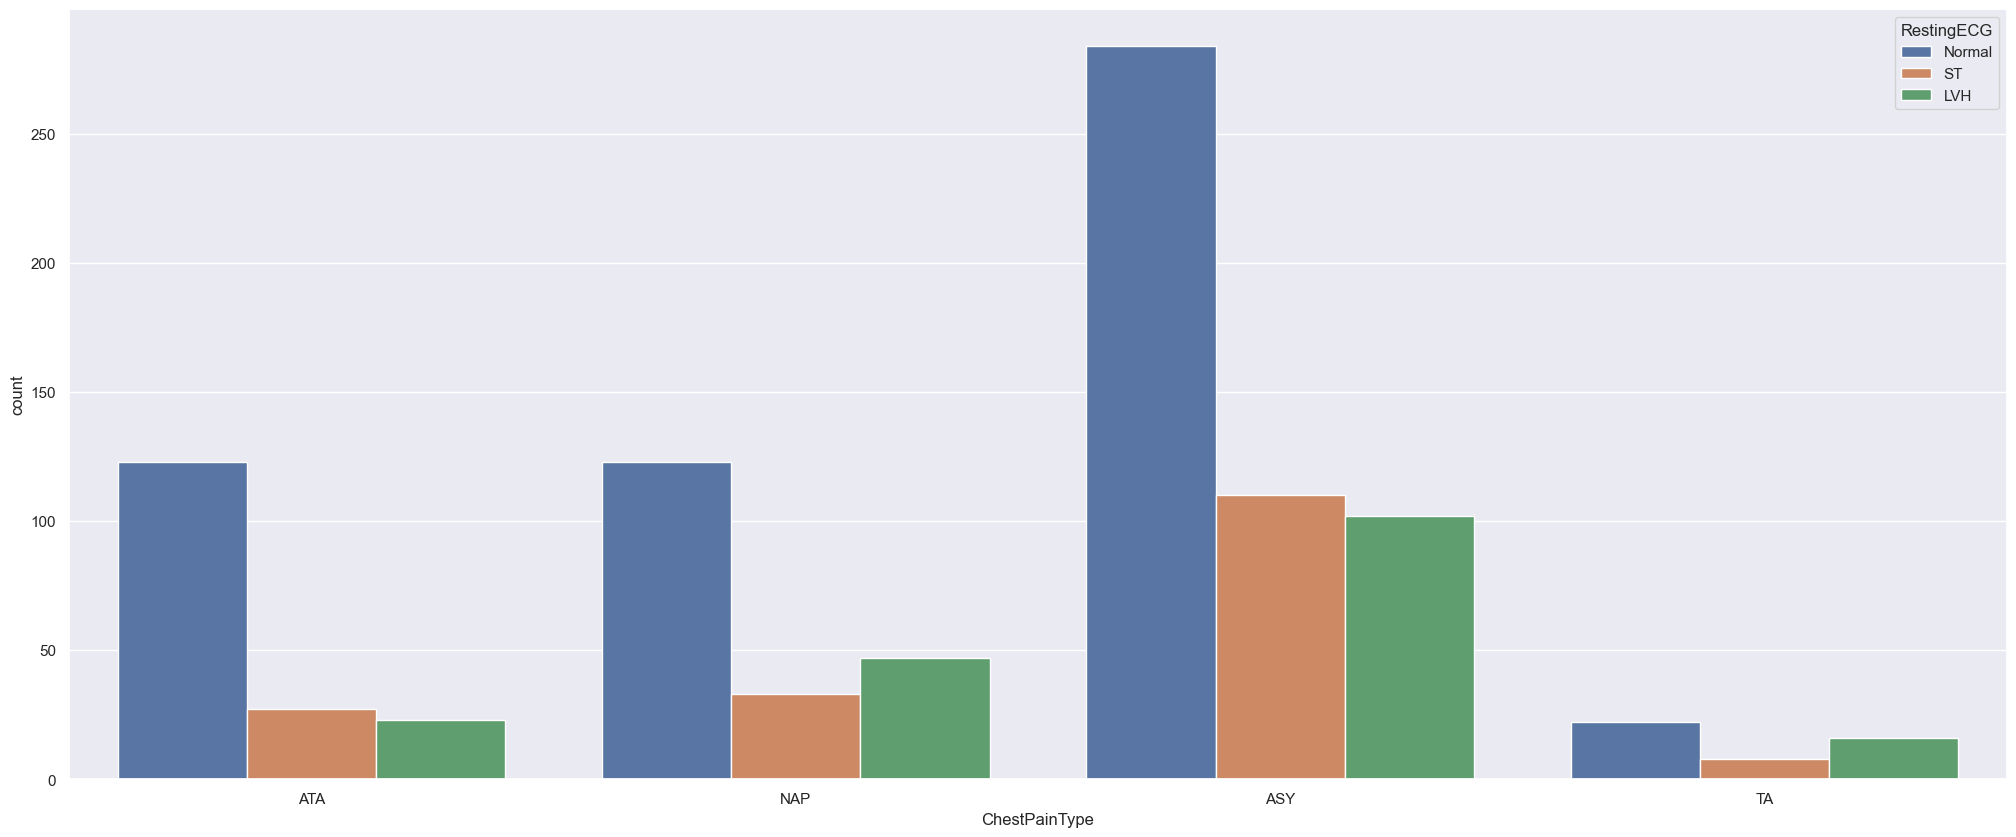

In [151]:
sns.countplot(x=df2['ChestPainType'], hue=df2['RestingECG']);

### 2.2.6 Exercise Angina and ST Slope

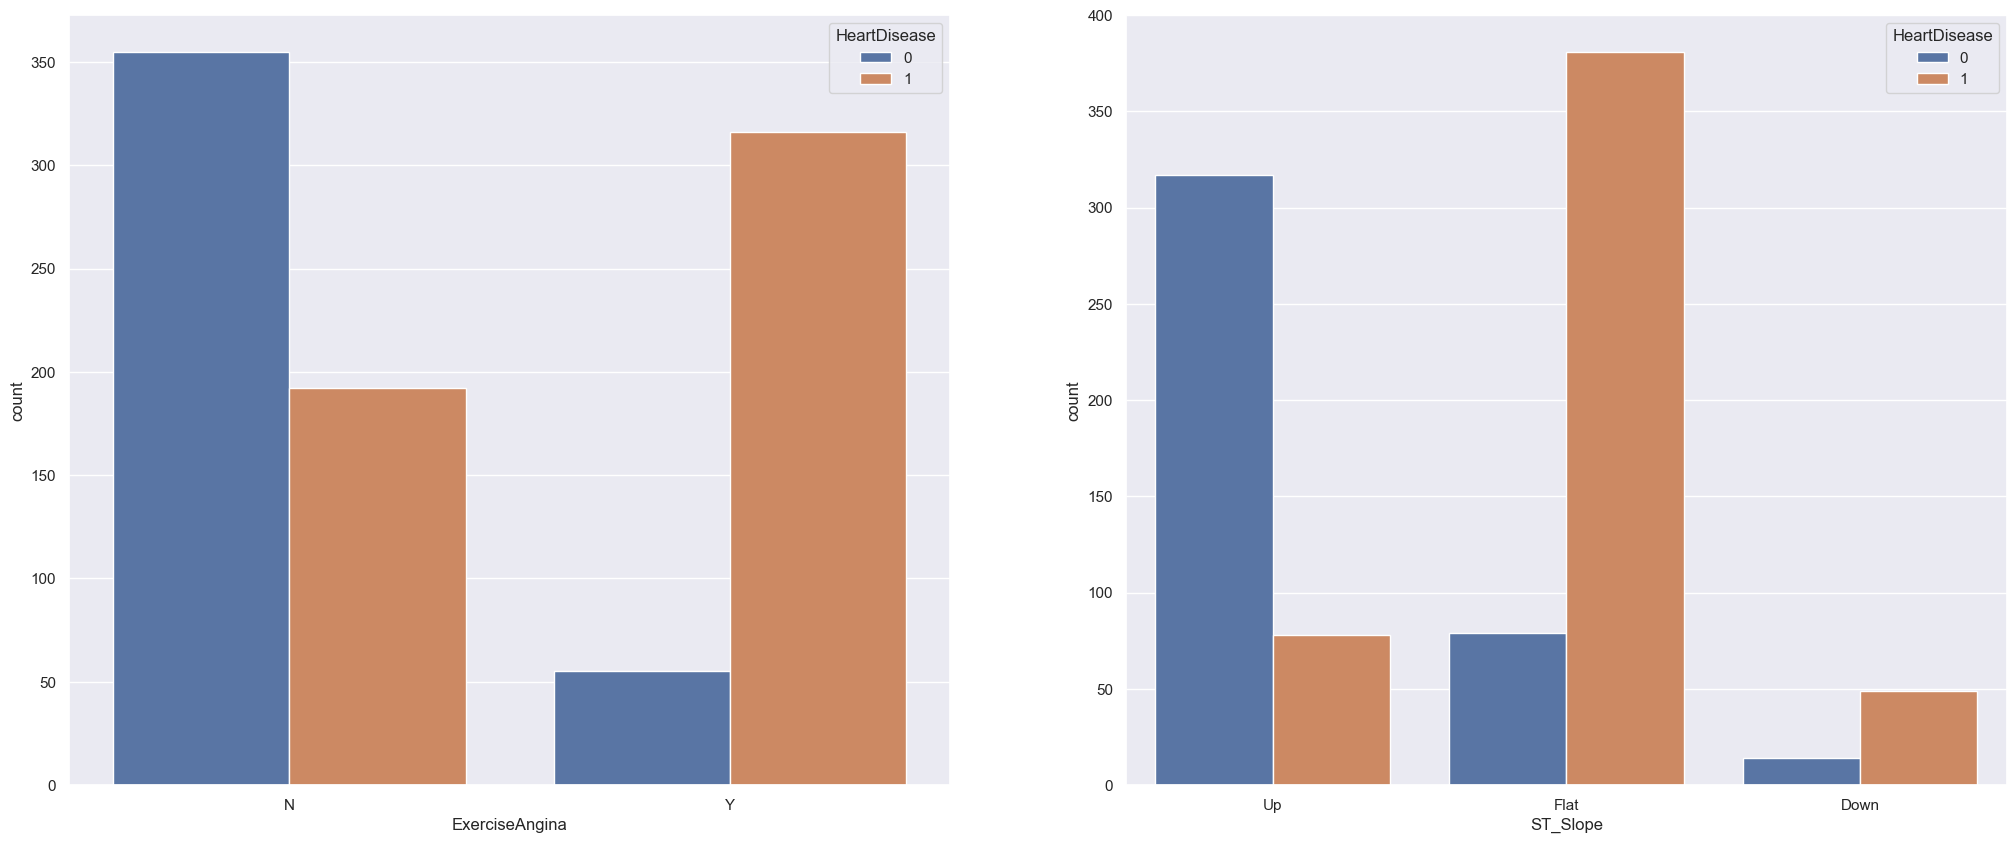

In [152]:
plt.subplot(1, 2, 1)
sns.countplot(x=df2['ExerciseAngina'], hue=df2['HeartDisease']);

plt.subplot(1, 2, 2)
sns.countplot(x=df2['ST_Slope'], hue=df2['HeartDisease']);

**Análise:**  
A análise das variáveis categóricas permitiu alguns insights.  

- A característica *Flat* do atributo *ST_Slope* é presente em quase 400 instâncias com *HeartDisease* igual 1, por outro lado a característica *Up* também se sobressai com mais de 300 casos de *HeartDisease* igual a 0.  

- Quase 400 casos de *HeartDisease* igual a 1 tem pacientes com *ChestPainType* do tipo ASY, ou seja, na maioria dos casos não há dores no peito, sendo considerados assintomáticos.  

- A variável *ExerciseAngina* também chamou atenção, se mostrando positiva para casos de *HeartDisease* igual 1 e negativa para *HeartDisease* igual a 0.  

- Outro ponto importante a ser considerado é o alto grau de desbalanceamento entre os sexos masculino e feminino, este atributo caso seja incorporado a modelagem por gerar overfitting devido a presença de mais linhas com sexo masculino.

# 3.0 DATA PREPARATION

In [169]:
df3 = df2.copy()

In [170]:
df3.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

## 3.1 Dummies

Os modelos de machine learning usarão somente dados numéricos para o treinamento de teste, portanto, as variáveis categóricas serão transformadas em variáveis numéricas através do método *get_dummies* da biblioteca pandas. O método consiste em transformas os valores presentes em cada feature em novas features com representação de 0 e 1.

In [171]:
df3 = pd.get_dummies(df3, columns = ['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Sex'])

Importante ressaltar que após utilizar o método *get_dummies*, as variáveis categóricas com somente dois valores passam a ter uma correlação perfeita e portanto é necessário escolher somente uma delas para uso na modelagem.

In [172]:
df3 = df3.drop(columns=['Sex_F', 'ExerciseAngina_N'])

In [173]:
df3.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up', 'Sex_M'],
      dtype='object')

## 3.2 Train and Test Split

In [174]:
X = df3.drop(columns=['HeartDisease'])
y = df3[['HeartDisease']]

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train size: {}'.format(X_train.shape[0]))
print('X_test size: {}'.format(X_test.shape[0]))
print('Train/Test proportion: {:.2f} / {:.2f}'.format(len(X_train)/X.shape[0], 
                                                      len(X_test)/X.shape[0]))

X_train size: 642
X_test size: 276
Train/Test proportion: 0.70 / 0.30


## 3.3 Rescaling

Conforme observamos durante a análise exploratória, na seção 2.1.2, as variáveis numéricas apresentam ranges e médias muito divergentes, que pode agregar, de forma equivocada à modelagem, pesos diferentes a features diferentes, passível de interferência no modelo. Portanto, será utilizado o método *StandardScaler* para a padronização dos dados.  

Esse método consiste no seguinte cálculo: z = (x - u) / s  

onde:
- "z" é o novo valor;
- "x" é o valor atual;
- "u" média do dataset;
- "s" desvio padrão do dataset

In [176]:
sts = preprocessing.StandardScaler()

In [177]:
cols = X_train.columns
cols

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal',
       'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat',
       'ST_Slope_Up', 'Sex_M'],
      dtype='object')

In [178]:
scaler = sts.fit(X_train)
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns=cols)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=cols)

In [180]:
with open('scaler.pkl', 'wb') as arquivo:
    pickle.dump(scaler, arquivo)

É importante ressaltar que o processo de rescaling deve ser feito com os conjuntos de treino e teste ja separados, uma vez que, o uso de métricas de tendência central (média) e variabilidade (desvio padrão) é influenciado pelo conjunto de dados utilizado.

## 3.4 Boruta Selector

O algoritmo boruta foi utilizado para a detecção das features mais viáveis a serem utilizadas no modelo.

In [181]:
X_train_b = X_train.values
y_train_b = y_train.values

In [182]:
# define RandomForestRegressor
rf = RandomForestClassifier(n_jobs=-1)

# define Boruta
boruta = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42).fit(X_train_b, y_train_b)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	9
Iteration:

In [183]:
cols_selected = boruta.support_.tolist()

In [184]:
# best features
cols_selected_boruta = X_train.iloc[:, cols_selected].columns.to_list()
cols_selected_boruta

['Age',
 'Cholesterol',
 'MaxHR',
 'Oldpeak',
 'ChestPainType_ASY',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up']

As colunas selecionadas pelo algoritmo boruta estão coerentes com os insights obtidos durante a EDA, o que mostra a importância do processo de descoberta dos dados para o conhecimento do problema a ser solucionado.

# 4.0 MACHINE LEARNING MODELLING

In [185]:
X_train = X_train[cols_selected_boruta]
X_test = X_test[cols_selected_boruta]

## 4.1 Decision Tree

In [186]:
decision_tree = DecisionTreeClassifier()

In [187]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [188]:
dt_result = decision_tree.predict(X_test)

In [189]:
print(metrics.classification_report(y_test, dt_result))

              precision    recall  f1-score   support

           0       0.19      0.31      0.24       112
           1       0.19      0.11      0.14       164

    accuracy                           0.19       276
   macro avg       0.19      0.21      0.19       276
weighted avg       0.19      0.19      0.18       276



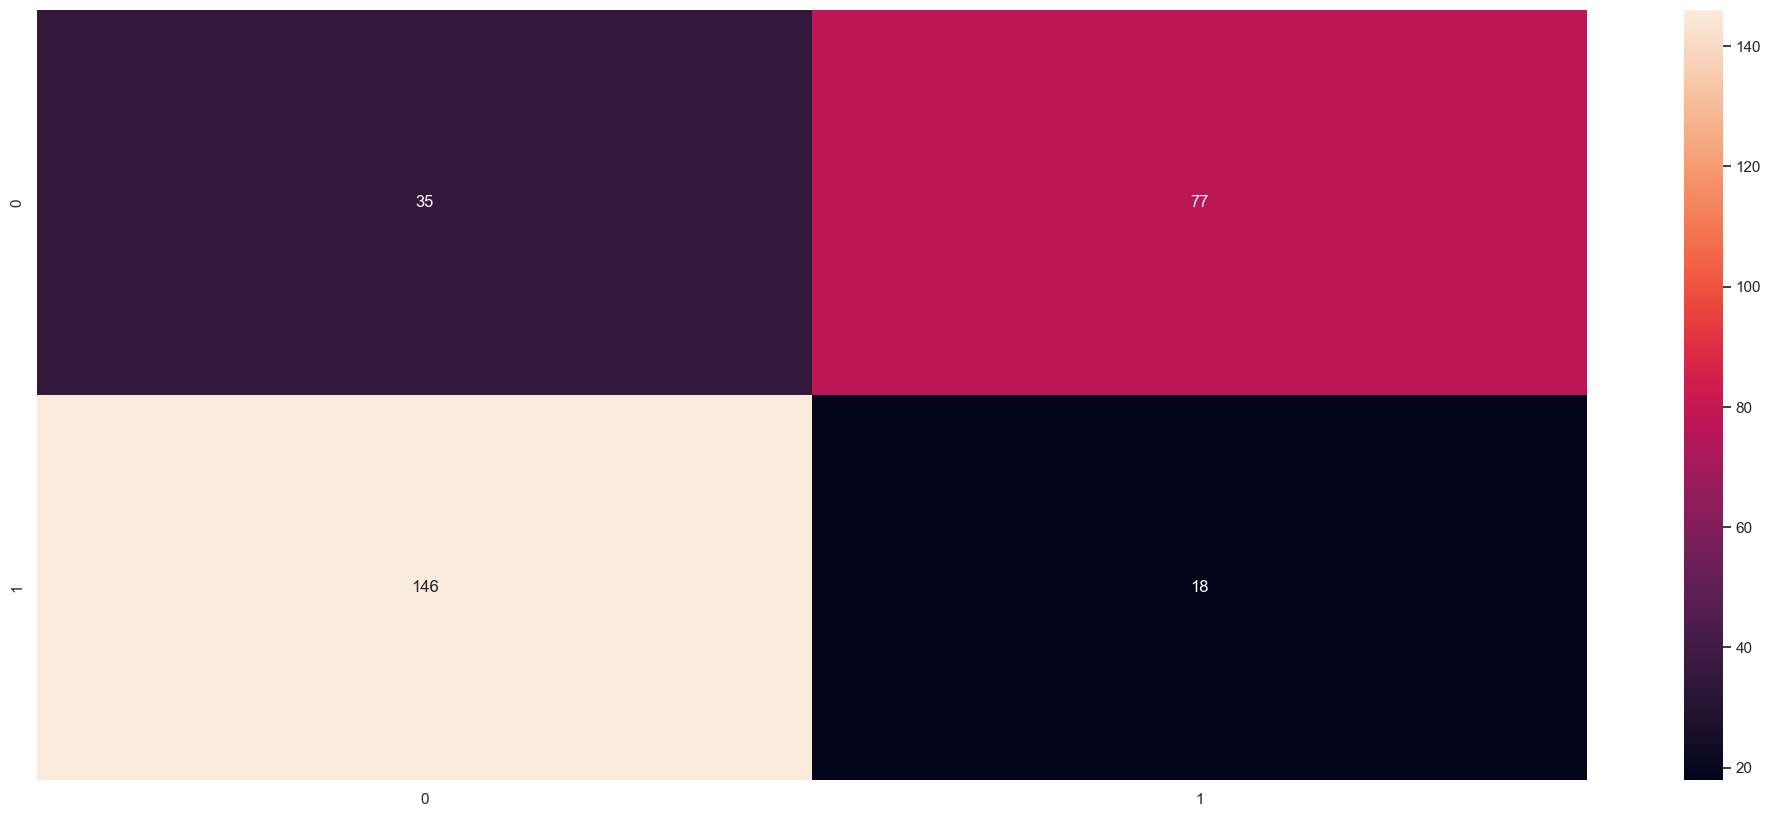

In [190]:
sns.heatmap(metrics.confusion_matrix(y_test, dt_result), annot=True, fmt=".0f");

### 4.1.1 Decision Tree - Cross Validation

In [191]:
dt_scores = cross_val_score(decision_tree, X, y, cv=5, scoring='f1')

In [192]:
dt_result_cv = dt_scores.mean()
dt_result_cv

0.7639534390468524

## 4.2 Random Forest

In [193]:
rf = RandomForestClassifier()

In [194]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [195]:
rf_result = rf.predict(X_test)

In [196]:
print(metrics.classification_report(y_test, rf_result))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68       112
           1       0.79      0.75      0.77       164

    accuracy                           0.73       276
   macro avg       0.72      0.73      0.72       276
weighted avg       0.74      0.73      0.73       276



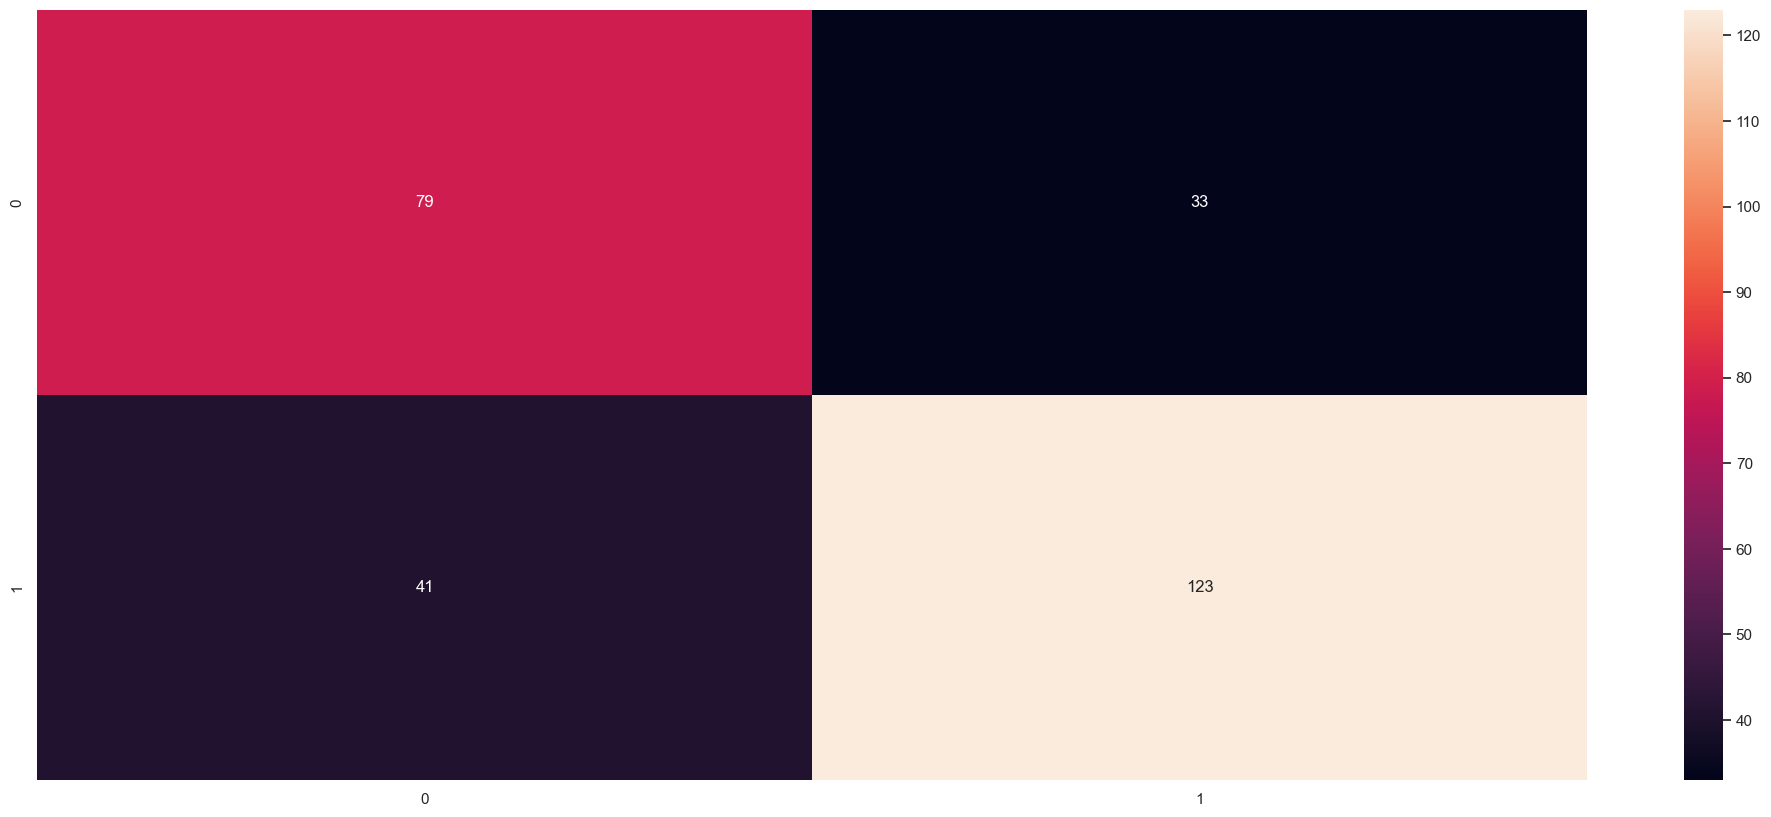

In [197]:
sns.heatmap(metrics.confusion_matrix(y_test, rf_result), annot=True, fmt=".0f");

### 4.2.1 Random Forest - Cross Validation

In [198]:
rf_scores = cross_val_score(rf, X, y, cv=5, scoring='f1')

In [199]:
rf_result_cv = rf_scores.mean()
rf_result_cv

0.8481164193850045

## 4.3 Logistic Regression

In [200]:
lg = LogisticRegression()

In [201]:
lg.fit(X_train, y_train)

LogisticRegression()

In [202]:
lg_result = lg.predict(X_test)

In [203]:
print(metrics.classification_report(y_test, lg_result))

              precision    recall  f1-score   support

           0       0.50      0.96      0.66       112
           1       0.93      0.34      0.49       164

    accuracy                           0.59       276
   macro avg       0.71      0.65      0.57       276
weighted avg       0.76      0.59      0.56       276



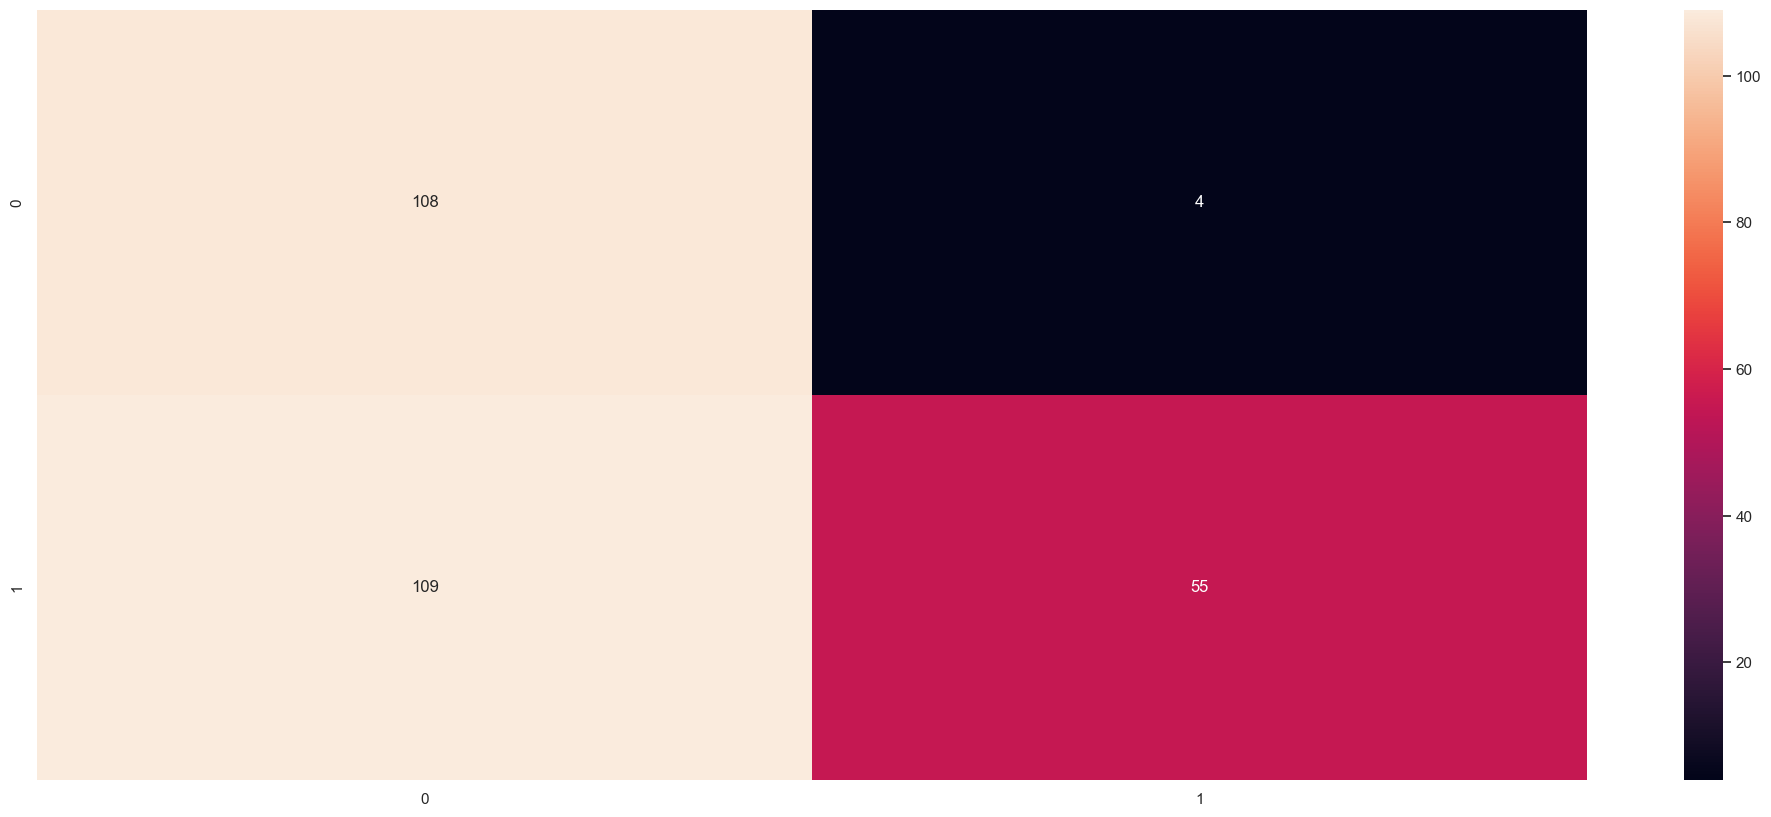

In [204]:
sns.heatmap(metrics.confusion_matrix(y_test, lg_result), annot=True, fmt='.0f');

### 4.3.1 Logistic Regression - Cross Validation

In [205]:
lg_scores = cross_val_score(lg, X, y, cv=5, scoring='f1')

In [206]:
lg_result_cv = lg_scores.mean()
lg_result_cv

0.8514700616799485

## 4.4 XGBoost

In [207]:
xgb = XGBClassifier()

In [208]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [209]:
xgb_result = xgb.predict(X_test)

In [210]:
print(metrics.classification_report(y_test, xgb_result))

              precision    recall  f1-score   support

           0       0.33      0.03      0.05       112
           1       0.59      0.96      0.73       164

    accuracy                           0.58       276
   macro avg       0.46      0.50      0.39       276
weighted avg       0.49      0.58      0.46       276



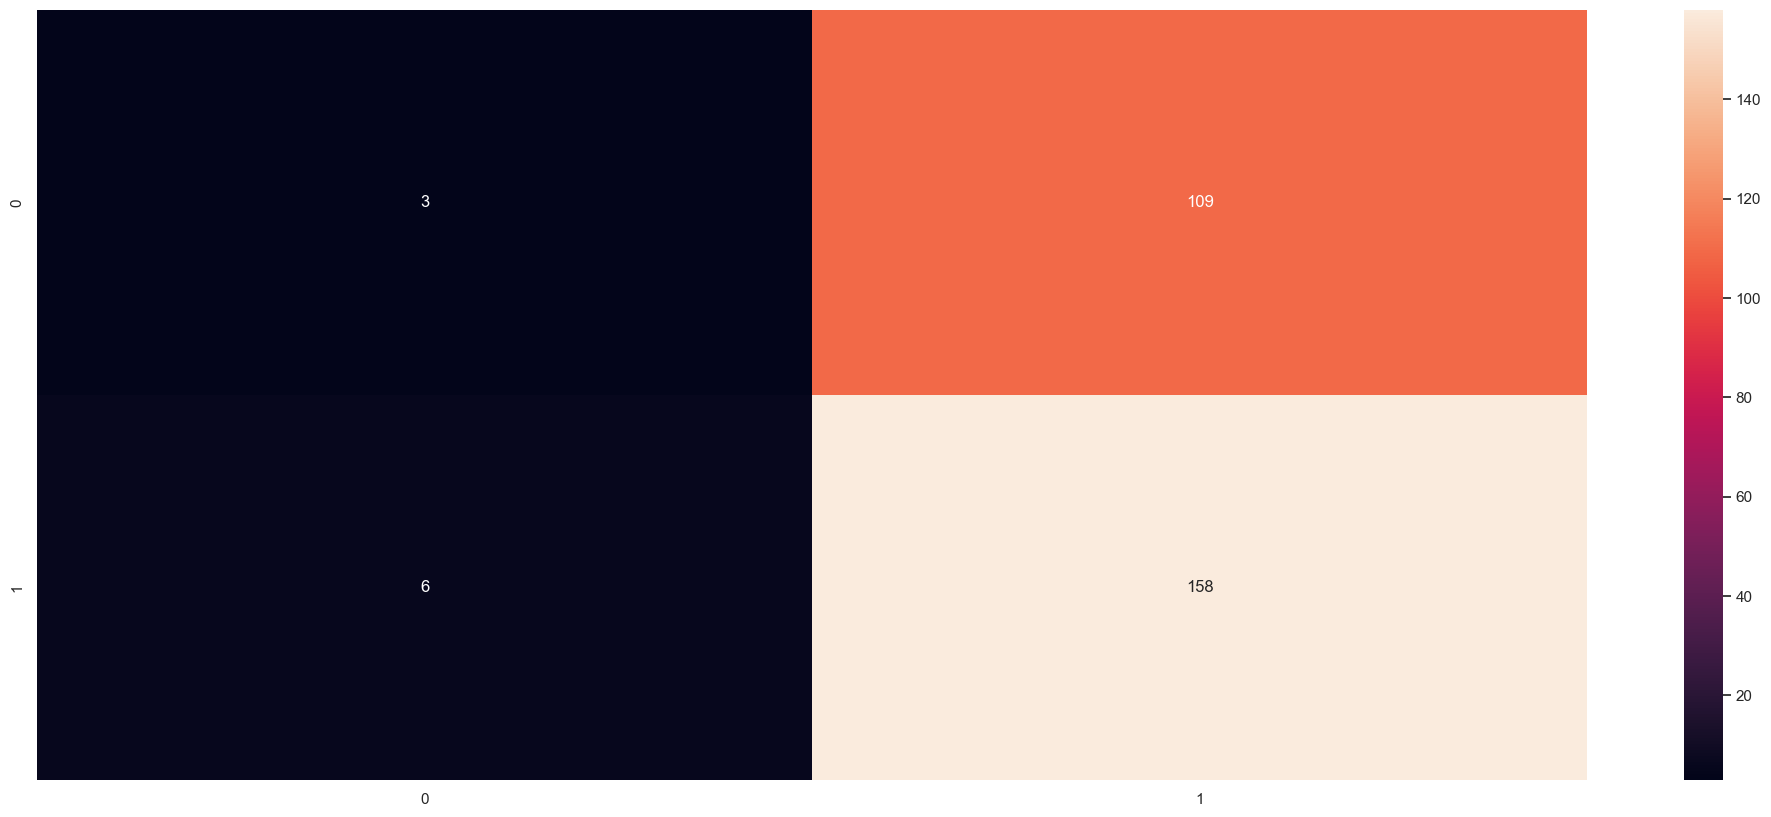

In [211]:
sns.heatmap(metrics.confusion_matrix(y_test, xgb_result), annot=True, fmt='.0f');

### 4.4.1 XGBoost - Cross Validation

In [212]:
xgb_scores = cross_val_score(xgb, X, y, cv=5, scoring='f1')

In [213]:
xgb_result_cv = xgb_scores.mean()
xgb_result_cv

0.8345314981264835

## 4.5 SVM

In [214]:
svm_clf = svm.SVC()

In [215]:
svm_clf.fit(X_train, y_train)

SVC()

In [216]:
svm_result = svm_clf.predict(X_test)

In [217]:
print(metrics.classification_report(y_test, svm_result))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.59      1.00      0.75       164

    accuracy                           0.59       276
   macro avg       0.30      0.50      0.37       276
weighted avg       0.35      0.59      0.44       276



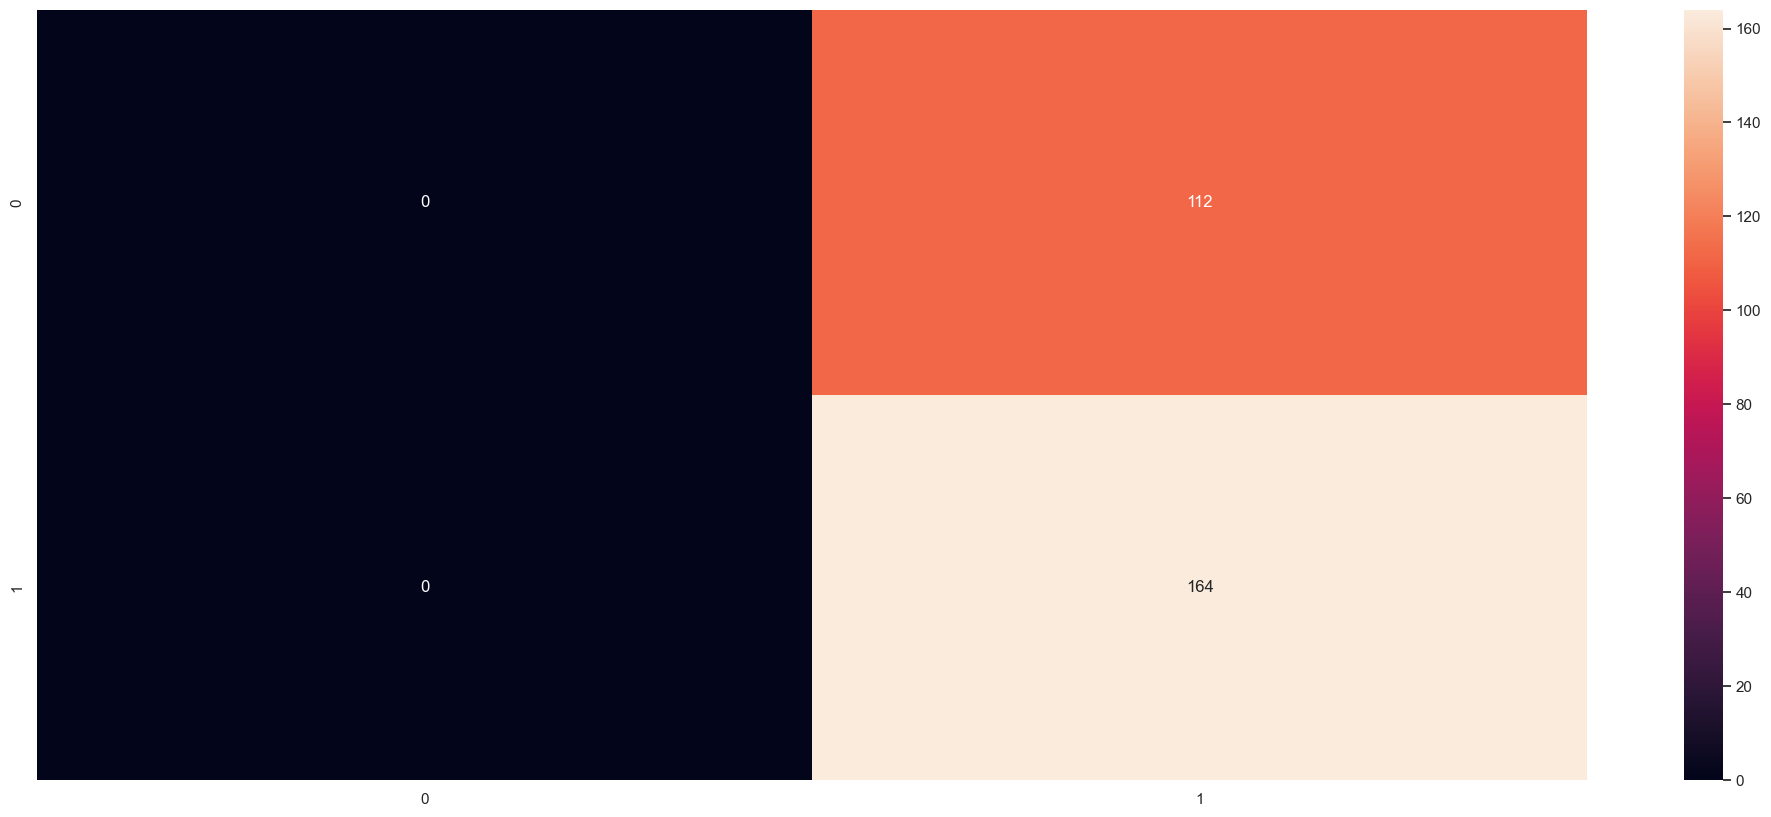

In [218]:
sns.heatmap(metrics.confusion_matrix(y_test, svm_result), annot=True, fmt='.0f');

### 4.5.1 SVM - Cross Validation

In [219]:
svm_scores = cross_val_score(svm_clf, X, y, cv=5, scoring='f1')

In [220]:
svm_result_cv = svm_scores.mean()
svm_result_cv

0.6874752343826185

## 4.6 KNN

In [230]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [231]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [232]:
knn_result = knn_clf.predict(X_test)

In [233]:
print(metrics.classification_report(y_test, knn_result))

              precision    recall  f1-score   support

           0       0.27      0.06      0.10       112
           1       0.58      0.88      0.70       164

    accuracy                           0.55       276
   macro avg       0.42      0.47      0.40       276
weighted avg       0.45      0.55      0.46       276



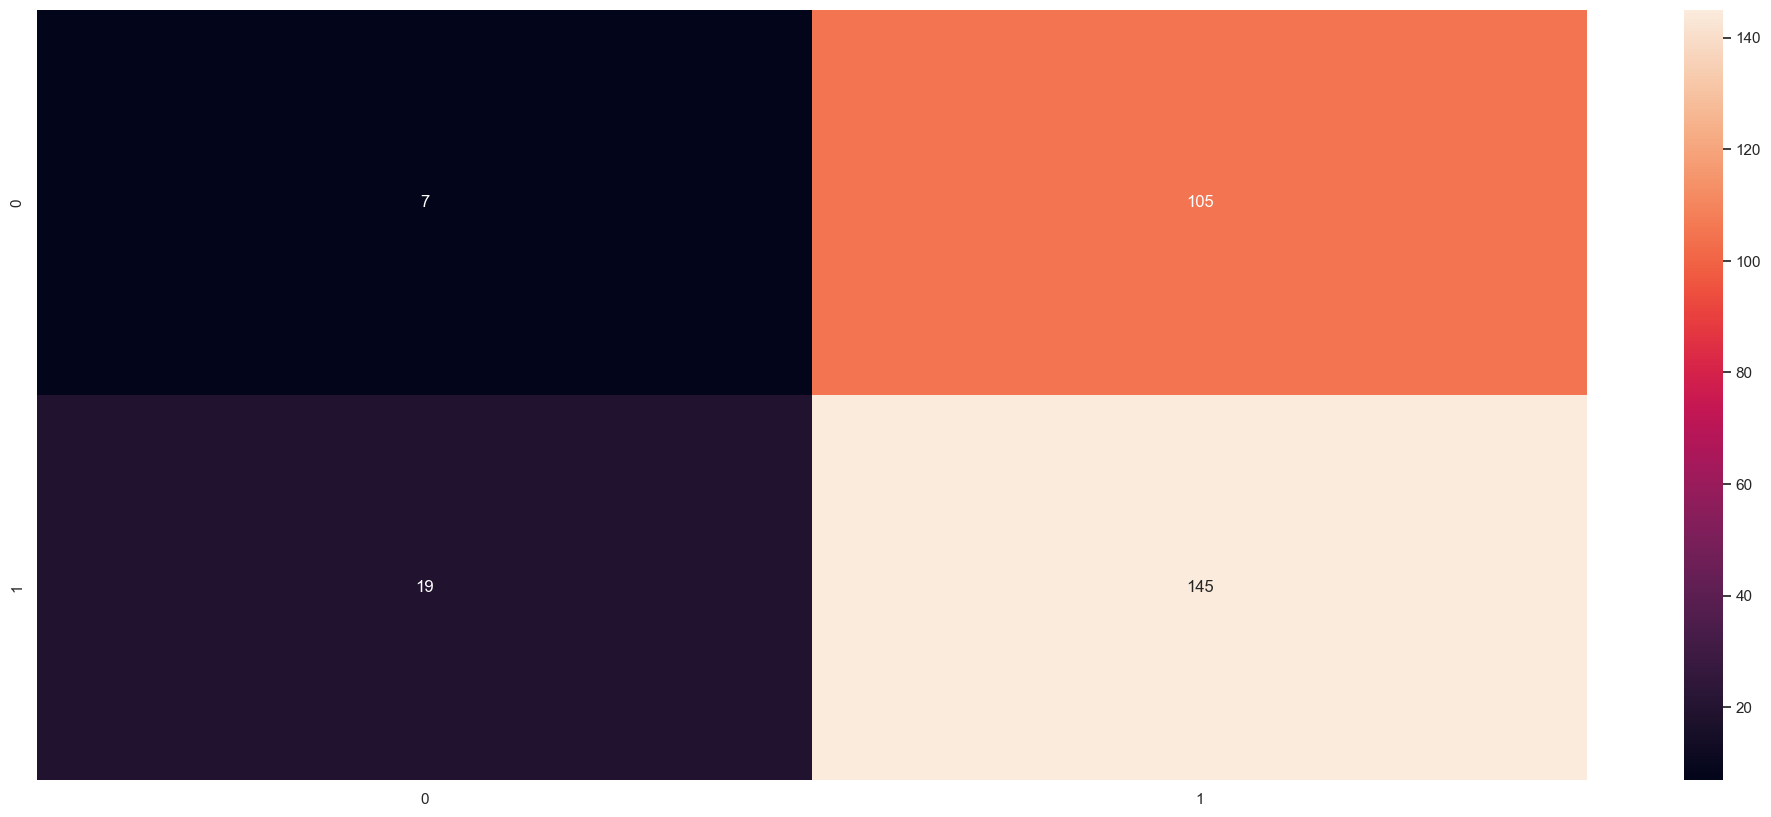

In [234]:
sns.heatmap(metrics.confusion_matrix(y_test, knn_result), annot=True, fmt='.0f');

### 4.6.1 KNN - Cross Validation

In [235]:
knn_scores = cross_val_score(knn_clf, X, y, cv=5, scoring='f1')

In [236]:
knn_result_cv = knn_scores.mean()
knn_result_cv

0.6735795457731487

## 4.7 Model Comparison - Cross Validation

In [237]:
result_dict = {
                'Decision Tree': dt_result_cv,
                'Random Forest': rf_result_cv,
                'Logistic Regression': lg_result_cv,
                'XGBoost': xgb_result_cv,
                'SVM': svm_result_cv,
                'KNN': knn_result_cv
                }

In [238]:
table = pd.DataFrame([result_dict]).T.sort_values(by=0, ascending=False)
table.columns = ['f1_score']
table

,f1_score
Logistic Regression,0.851470
Random Forest,0.848116
XGBoost,0.834531
Decision Tree,0.763953
SVM,0.687475
KNN,0.673580


**Análise:**  
Como métrica para a comparação será utilizado o f1-score, calculado como a média harmônica entre a precisão e o recall, cuja equação é apresentada abaixo:  

F1 = 2 * (precision * recall) / (precision + recall)

O modelo com melhor desempenho utilizando a média dos score no cross validation foi a Regressão Logística, com f1-score de 0,8514.

### 4.7.1 Learning Curve - Logistic Regression

In [239]:
X_lc = X[cols_selected_boruta]

In [240]:
train_sizes, train_scores, test_scores = learning_curve(lg, X_lc, y, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 15), scoring='f1')

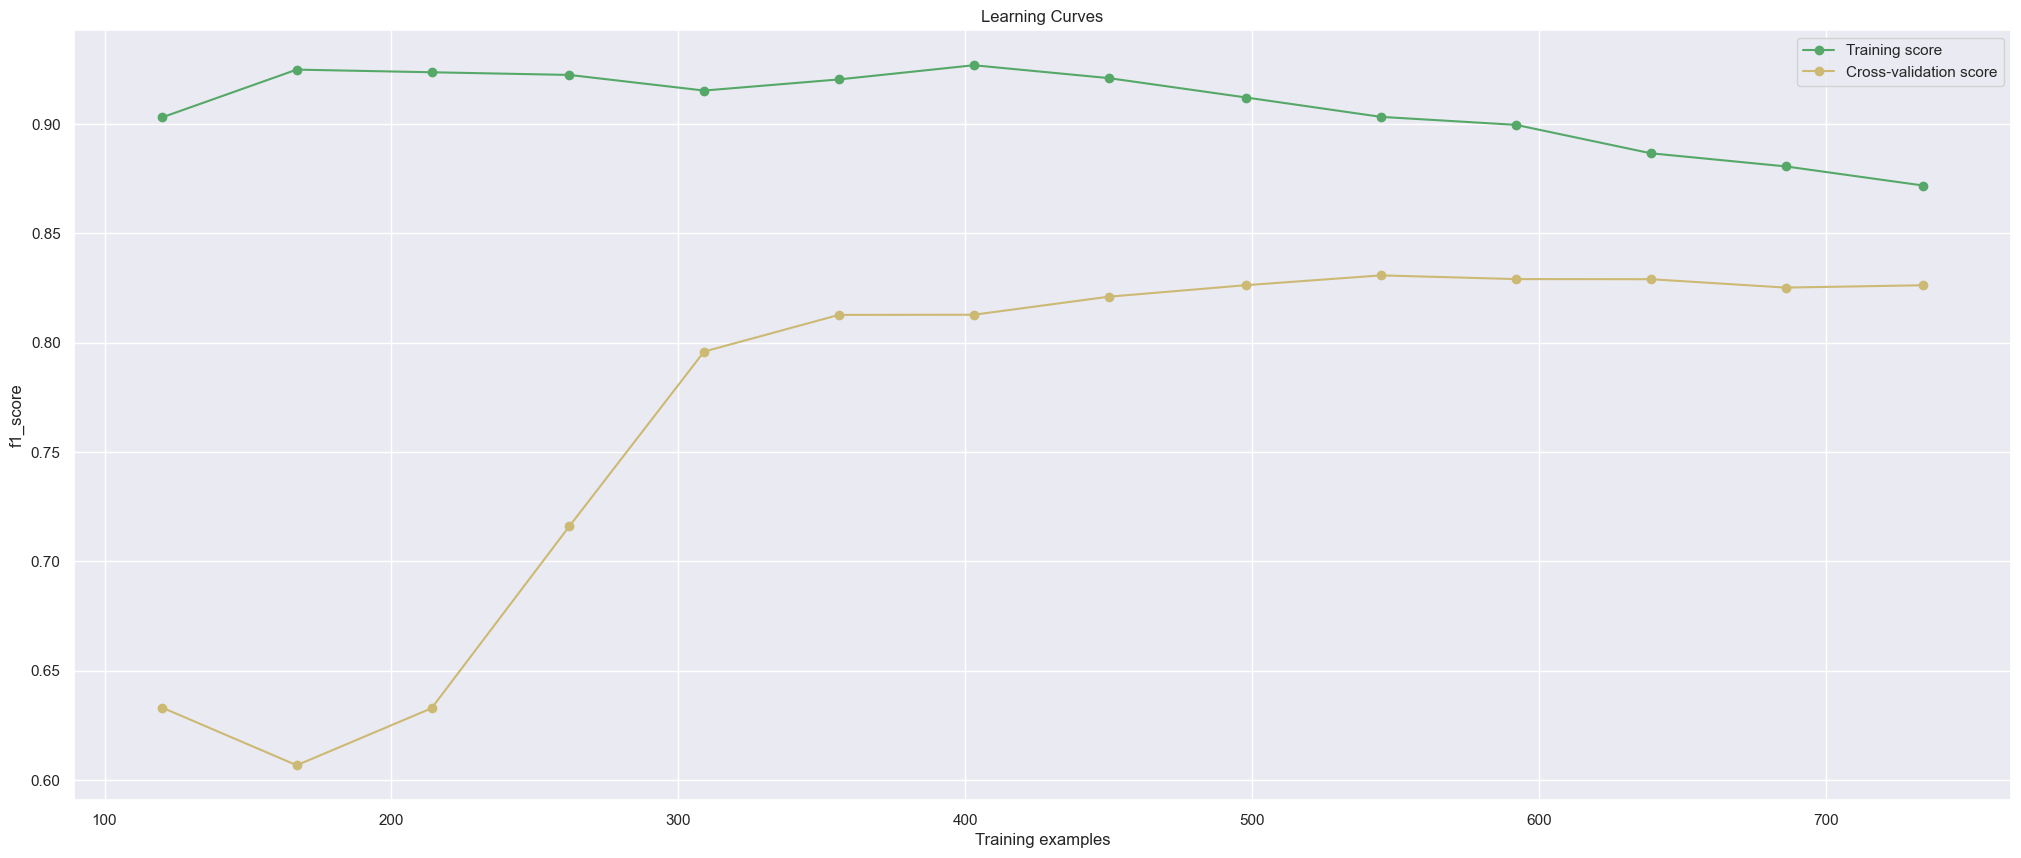

In [241]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid

plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('f1_score')

plt.plot(train_sizes, train_scores_mean, 'o-', color='g', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='y', label='Cross-validation score')

plt.legend(loc='best')
plt.show()

A curva de aprendizagem foi plotada com o intuito de identificar um possível viés do modelo.  

- A priori, as curvas tendem a convergir conforme o número de amostras aumenta, um ponto positivo para a curva de aprendizado;  

- A curva verde (referente aos dados de treinamento) diminui gradualmente, enquanto a curva amarela (referente aos dados de validação) aumenta a sua perfomance conforme o número de amostras aumenta, dessa forma podemos excluir hipóteses de *underfitting* ou *overfitting*;  

- Utilizando f1-score obtido durante o cross validation (approx 0,85) como referência, nota-se que as curvas ainda não convergiram, mas tendem a este ponto. Portanto, há ainda oportunidade de melhora para a modelagem através dos obtenção de mais dados ou do tunning do modelo. 

# 5.0 HYPERPARAMETER FINE TUNING

In [242]:
param = {'penalty': ['None', 'l2', 'l1', 'elasticnet'],
         'C': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
        }

In [243]:
gd_search = GridSearchCV(lg, param, cv=5, scoring='f1', verbose=True)

In [244]:
gd_search.fit(X, y)

Fitting 5 folds for each of 264 candidates, totalling 1320 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0],
                         'penalty': ['None', 'l2', 'l1', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1', verbose=True)

In [245]:
best_params = gd_search.best_params_
best_result = gd_search.best_score_
print(best_params)
print(best_result)

{'C': 0.4, 'penalty': 'l2', 'solver': 'lbfgs'}
0.8546779847105119


In [246]:
lg_tuned =  LogisticRegression(penalty='l2', C=0.4, solver='lbfgs')

In [247]:
lg_tuned.fit(X_train, y_train)

LogisticRegression(C=0.4)

In [248]:
lg_result_tuned = lg_tuned.predict(X_test)

In [249]:
print(metrics.classification_report(y_test, lg_result_tuned))

              precision    recall  f1-score   support

           0       0.49      0.96      0.65       112
           1       0.93      0.32      0.48       164

    accuracy                           0.58       276
   macro avg       0.71      0.64      0.57       276
weighted avg       0.75      0.58      0.55       276



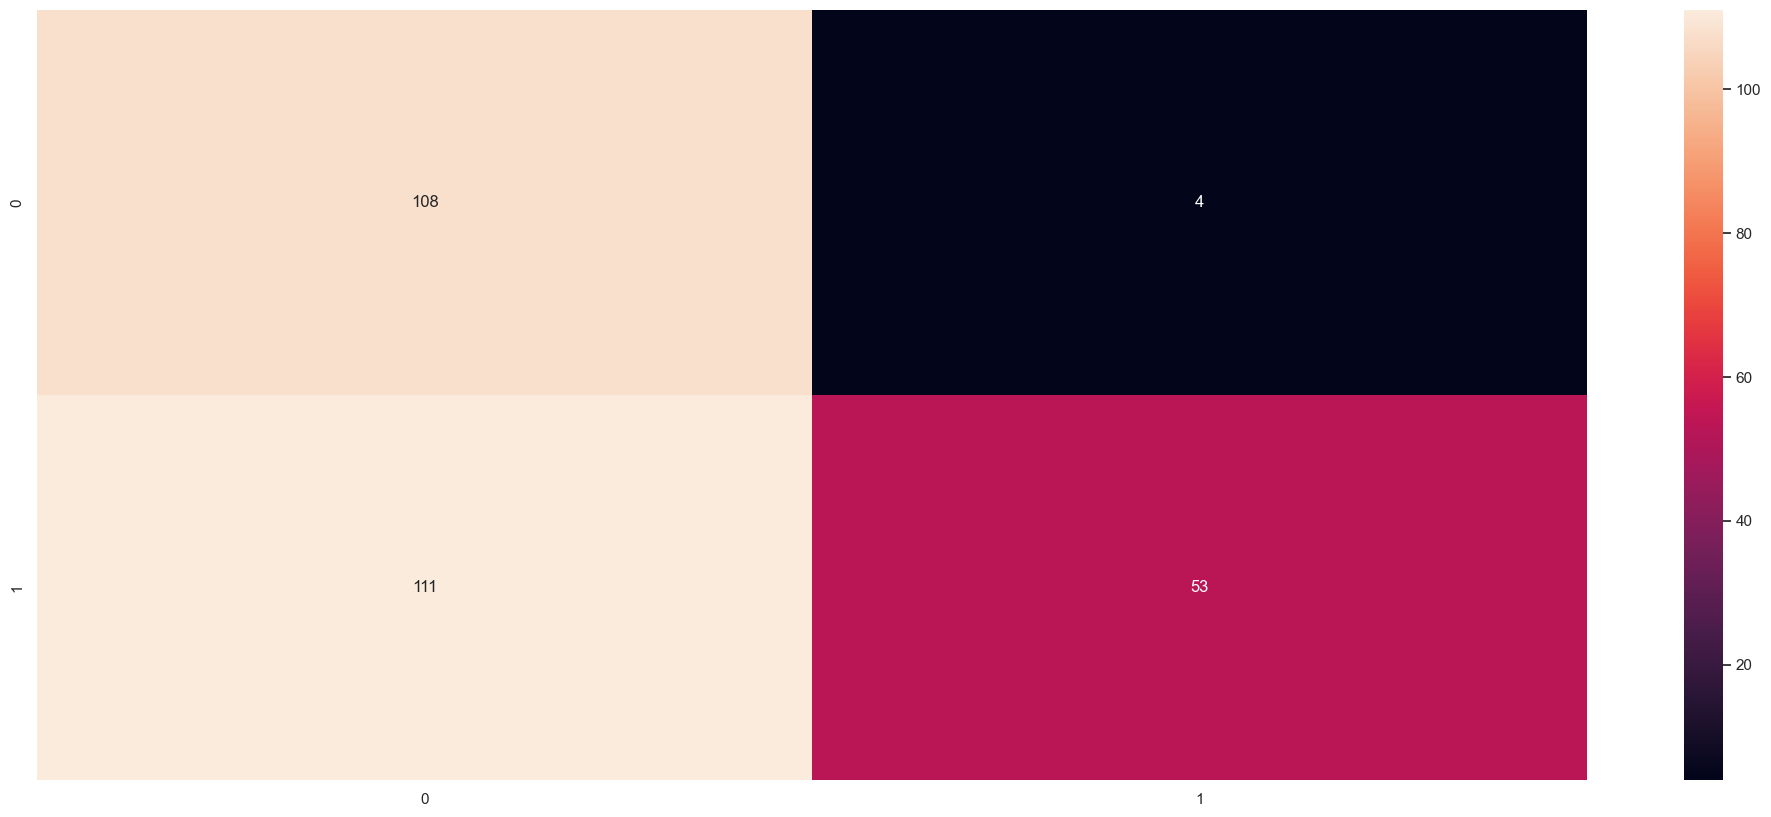

In [250]:
sns.heatmap(metrics.confusion_matrix(y_test, lg_result_tuned), annot=True, fmt='.0f');

In [251]:
lg_scores_tuned = cross_val_score(lg_tuned, X, y, cv=5, scoring='f1')
lg_scores_tuned

array([0.86315789, 0.87628866, 0.87445887, 0.88461538, 0.77486911])

In [252]:
lg_result_cv_tuned = lg_scores_tuned.mean()
lg_result_cv_tuned

0.8546779847105119

**Análise:**  
O uso do *GridSearchCV* proporcionou um aumento do f1-score de 0,8514 para 0,8546

# 6.0 SAVING MODEL

In [253]:
with open('model.pkl', 'wb') as arquivo:
    pickle.dump(lg_tuned, arquivo)